In this file we do an exploratory data analysis(EDA) 

We present in the next table the variables associated with our dataset for the auto loan application analysis. This table includes features that help us understand and predict loan application outcomes.

| **Variable**                          | **Description**                                                                                                                |
|---------------------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| **fico**                              | FICO score at origination (valid range 250-900).                                                                                |
| **amtfinanced_1req**                  | Requested loan amount.                                                                                                         |
| **collateral_dlrinput_newuse_d_1req** | New/Used vehicle purchased.                                                                                                    |
| **pti_1req**                          | Payment to income ratio.                                                                                                       |
| **ltv_1req**                          | Loan to value ratio.                                                                                                           |
| **p12_reh7120_a**                     | Maximum single balance to credit amount ratio on an open revolving trade reported in the last 6 months with credit amount > 0, excluding home equity line of credit trades. |
| **p12_bcx7110_a**                     | Overall balance to credit amount ratio on open revolving bankcard trades reported in the last 6 months with credit amount > 0, excluding authorized user trades. |
| **p12_all7170_a**                     | Overall amount past due to balance ratio on trades reported in the last 6 months excluding collections.                        |
| **p12_aut7110_a**                     | Overall balance to credit amount ratio on open auto loan trades reported in the last 6 months with credit amount > 0.          |
| **p12_all7120_a**                     | Maximum single balance to credit amount ratio on an open trade reported in the last 6 months with credit amount > 0.          |
| **p12_all7937_a**                     | Percentage of trades reported in the last 12 months including collections that are never delinquent or derogatory occurred in the last 12 months. |
| **p12_bcc8120_a**                     | Number of months since the most recently opened revolving bankcard trade including indeterminates.                           |
| **p12_iln7410_a**                     | Percentage of installment trades that are open and reported in the last 6 months.                                             |
| **p12_revl300_a**                     | Total number of revolving trades never delinquent or derogatory.                                                              |
| **p12_all8150_a**                     | Number of months since the most recent 30 days delinquency on trades, excluding collections and other unsatisfied derogatory including indeterminates. |
| **p12_bca8370_a**                     | Average life span of a bankcard revolving and charge trade (in months) including indeterminates.                               |
| **p12_all7517_a**                     | Percentage of open trades that were opened in the last 12 months.                                                              |
| **p12_iln8220_a**                     | Number of months since the oldest installment trade was opened including indeterminates.                                       |
| **p12_all6250_a**                     | Worst ever status on a trade in the first 12 months of open date excluding collections including indeterminates.               |
| **p12_aua815l_a**                     | Number of months since the most recent 30-180 days delinquency on auto loan or lease trades, excluding unsatisfied derogatory including indeterminates. |
| **p12_rtr7110_a**                     | Overall balance to credit amount ratio on open revolving retail trades reported in the last 6 months with credit amount > $0$. |
| **p12_pil8120_a**                     | Number of months since the most recently opened personal installment trade including indeterminates.                         |
| **p12_aua0300_a**                     | Total number of auto loan or lease trades.                                                                                      |
| **p12_all7938_a**                     | Percentage of trades reported in the last 24 months including collections that are never delinquent or derogatory occurred in the last 24 months. |
| **p12_bcc3456_a**                     | Total number of open revolving bankcard trades with credit amount >= $5000$ reported in the last 6 months.                     |
| **p12_all8370_a**                     | Average life span of a trade (in months) excluding collections including indeterminates.                                       |
| **p12_aua8220_a**                     | Number of months since the oldest auto loan or lease trade was opened including indeterminates.                                |
| **p12_alsl300_a**                     | Total number of trades never delinquent or derogatory excluding student loans.                                                 |
| **p12_aua6200_a**                     | Worst ever status on an auto loan or lease trade including indeterminates.                                                     |
| **p12_all2427_a**                     | Total number of trades opened in the last 12 months ever 30 or more days delinquent or derogatory excluding collections.       |
| **p12_alm6200_a**                     | Worst ever status on a trade including non-medical collections and indeterminates.                                             |
| **p12_all697l_a**                     | Worst ever status on a trade in the last 12 months including unsatisfied collections and indeterminates.                      |
| **clntr9437_a**                       | Total number of non-traditional cluster inquiries in the last 12 months.                                                       |
| **clact9429_a**                       | Total number of inquiries made in the last 365 days.                                                                            |
| **clall5010_a**                       | Balance on open or closed trades.                                                                                              |
| **clall2434_a**                       | Total number of trades ever 90+ days delinquency or derogatory occurred in the last 30 days.                                  |
| **cloil0214_a**                       | Total number of paid off online installment trades in the last 30 days.                                                        |
| **cltra4405_a**                       | Total number of traditional 90+ days delinquency occurrences in the last 3 months.                                            |
| **clact9428_a**                       | Total number of inquiries made in the last 90 days.                                                                            |
| **Gender**                            | Gender of the primary applicant.                                                                                               |
| **Race**                              | Race of the primary applicant.                                                                                                 |
| **aprv_flag**                         | Indicator of approval. 1 = approved the auto loan application; 0 = rejected the application.                                   |
| **bad_flag**                          | Loan performance in recent 12 months. 1 = Never delinquent or 2 times or less 30 DPD; 0 = One-time 60 DPD or worse, charge off, bankruptcy, and repossession. |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loading import load_data

train_data_path="D:/Pycharm/AutoLoanModel/Training Dataset.csv"
test_data_path="D:/Pycharm/AutoLoanModel/Testing Dataset.csv"
train_df, test_df = load_data(train_data_path,test_data_path)   

In [2]:
train_df.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.0,72.0,3.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.0,84.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.0,13.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.0,12.0,0.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,NaN,NaN,0.0,NaN,...,7.0,21.0,NaN,NaN,NaN,NaN,5.0,0.0,Male,White


In [3]:
test_df.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,681.0,1,30966.0,USED,4.74,91.96,85.0,70.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Undefined,White
1,626.0,0,18363.0,USED,3.37,87.90,NaN,NaN,0.0,85.0,...,3.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,Female,White
2,776.0,1,50768.0,NEW,3.86,107.87,22.0,18.0,0.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,Hispanic
3,721.0,1,49657.0,NEW,3.71,99.36,93.0,83.0,0.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Male,White
4,NaN,0,14412.0,USED,7.94,111.50,42.0,20.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,White


In [4]:
train_df['Gender'].unique() #There are two genders: Females and Males, in addition to some undefined.

array(['Female', 'Male', 'Undefined'], dtype=object)

In [5]:
train_df['Race'].unique() #There are several races: Hispanic, White, Black, Asian, in addition to some others.

array(['White', 'Other', 'Hispanic', 'Black', 'Asian'], dtype=object)

In [6]:
train_df['collateral_dlrinput_newused_1req'].unique() #There are two types of vehicles: New and used.

array(['NEW', 'USED'], dtype=object)

In [7]:
# Display basic info
print("Train Data Info:")
print(train_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              21431 non-null  float64
 1   aprv_flag                         21606 non-null  int64  
 2   amtfinanced_1req                  21606 non-null  float64
 3   collateral_dlrinput_newused_1req  21606 non-null  object 
 4   pti_1req                          21603 non-null  float64
 5   ltv_1req                          21601 non-null  float64
 6   p12_reh7120_a                     19694 non-null  float64
 7   p12_bcx7110_a                     17917 non-null  float64
 8   p12_all7170_a                     20943 non-null  float64
 9   p12_aut7110_a                     11070 non-null  float64
 10  p12_all7120_a                     21226 non-null  float64
 11  p12_all7937_a                     21522 non-null  

In [8]:
print("Test Data Info:")
print(test_df.info())

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              5343 non-null   float64
 1   aprv_flag                         5400 non-null   int64  
 2   amtfinanced_1req                  5400 non-null   float64
 3   collateral_dlrinput_newused_1req  5400 non-null   object 
 4   pti_1req                          5398 non-null   float64
 5   ltv_1req                          5398 non-null   float64
 6   p12_reh7120_a                     4916 non-null   float64
 7   p12_bcx7110_a                     4442 non-null   float64
 8   p12_all7170_a                     5206 non-null   float64
 9   p12_aut7110_a                     2788 non-null   float64
 10  p12_all7120_a                     5295 non-null   float64
 11  p12_all7937_a                     5381 non-null   flo

In [9]:
# Check for missing values
print("Missing Values in Train Data:")
print(train_df.isnull().sum())

Missing Values in Train Data:
fico                                  175
aprv_flag                               0
amtfinanced_1req                        0
collateral_dlrinput_newused_1req        0
pti_1req                                3
ltv_1req                                5
p12_reh7120_a                        1912
p12_bcx7110_a                        3689
p12_all7170_a                         663
p12_aut7110_a                       10536
p12_all7120_a                         380
p12_all7937_a                          84
p12_bcc8120_a                        1854
p12_iln7410_a                        2242
p12_rev1300_a                         796
p12_all8150_a                       12399
p12_bca8370_a                        1585
p12_all7517_a                         344
p12_iln8220_a                        1930
p12_all6250_a                           0
p12_aua8151_a                       17814
p12_rtr7110_a                        9275
p12_pil8120_a                        9749
p12_

In [10]:
print("Missing Values in Test Data:")
print(test_df.isnull().sum())

Missing Values in Test Data:
fico                                  57
aprv_flag                              0
amtfinanced_1req                       0
collateral_dlrinput_newused_1req       0
pti_1req                               2
ltv_1req                               2
p12_reh7120_a                        484
p12_bcx7110_a                        958
p12_all7170_a                        194
p12_aut7110_a                       2612
p12_all7120_a                        105
p12_all7937_a                         19
p12_bcc8120_a                        473
p12_iln7410_a                        528
p12_rev1300_a                        201
p12_all8150_a                       3127
p12_bca8370_a                        402
p12_all7517_a                         93
p12_iln8220_a                        460
p12_all6250_a                          0
p12_aua8151_a                       4471
p12_rtr7110_a                       2304
p12_pil8120_a                       2458
p12_aua0300_a               

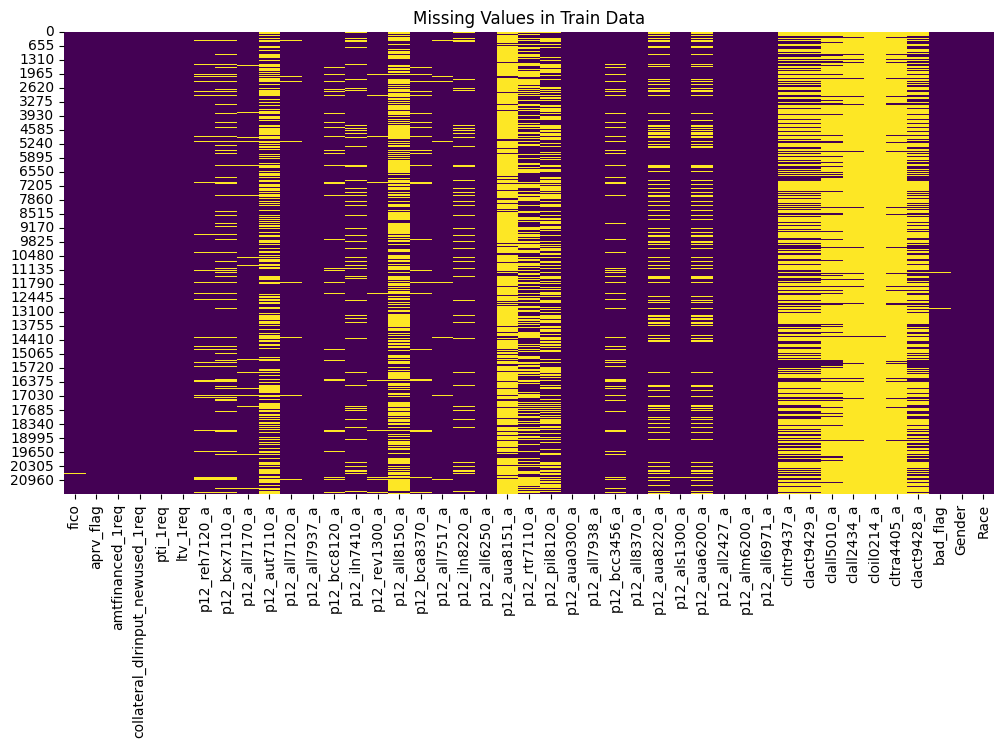

In [11]:
# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Train Data")
plt.show()

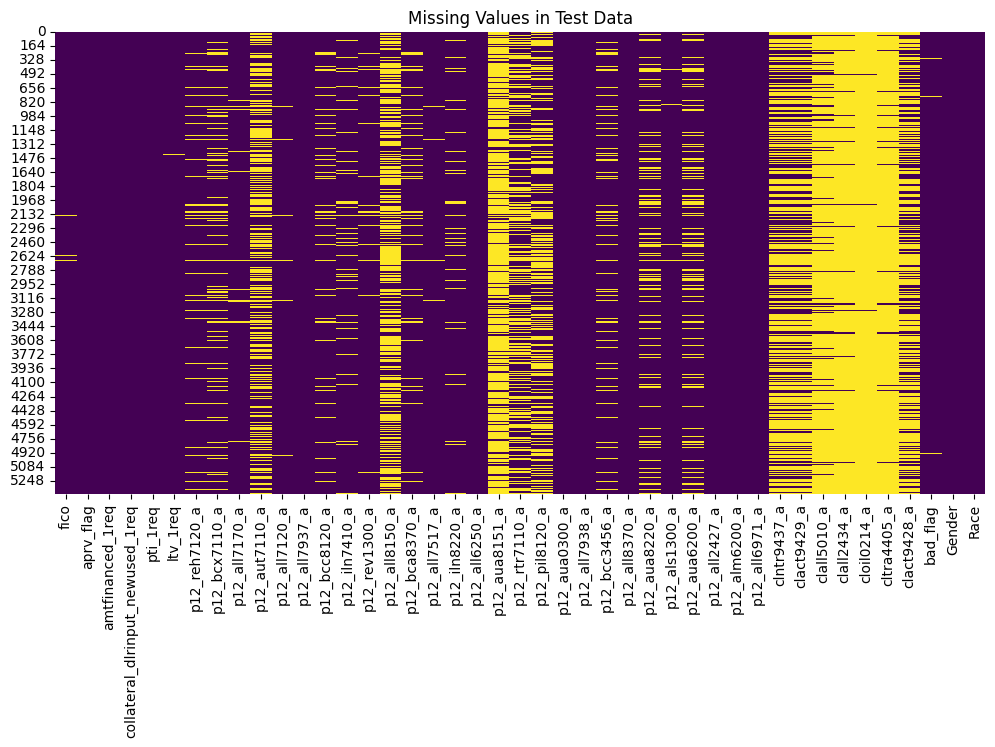

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Test Data")
plt.show()

In [13]:
# Plot the percentage of the missing data in train_df
def missing_data_plot(df_data):
    missing_percent_train = ((df_data.isnull().sum()/len(df_data))*100).round(2)
    plt.figure(figsize=(16, 6))
    missing_percent_train.plot(kind='bar')
    plt.title('Percentage of Missing Values per Feature')
    plt.xlabel('Features')
    plt.ylabel('Percentage')
    plt.xticks(rotation=60)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate each bar with percentage
    for i, v in enumerate(missing_percent_train):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)
    plt.show()

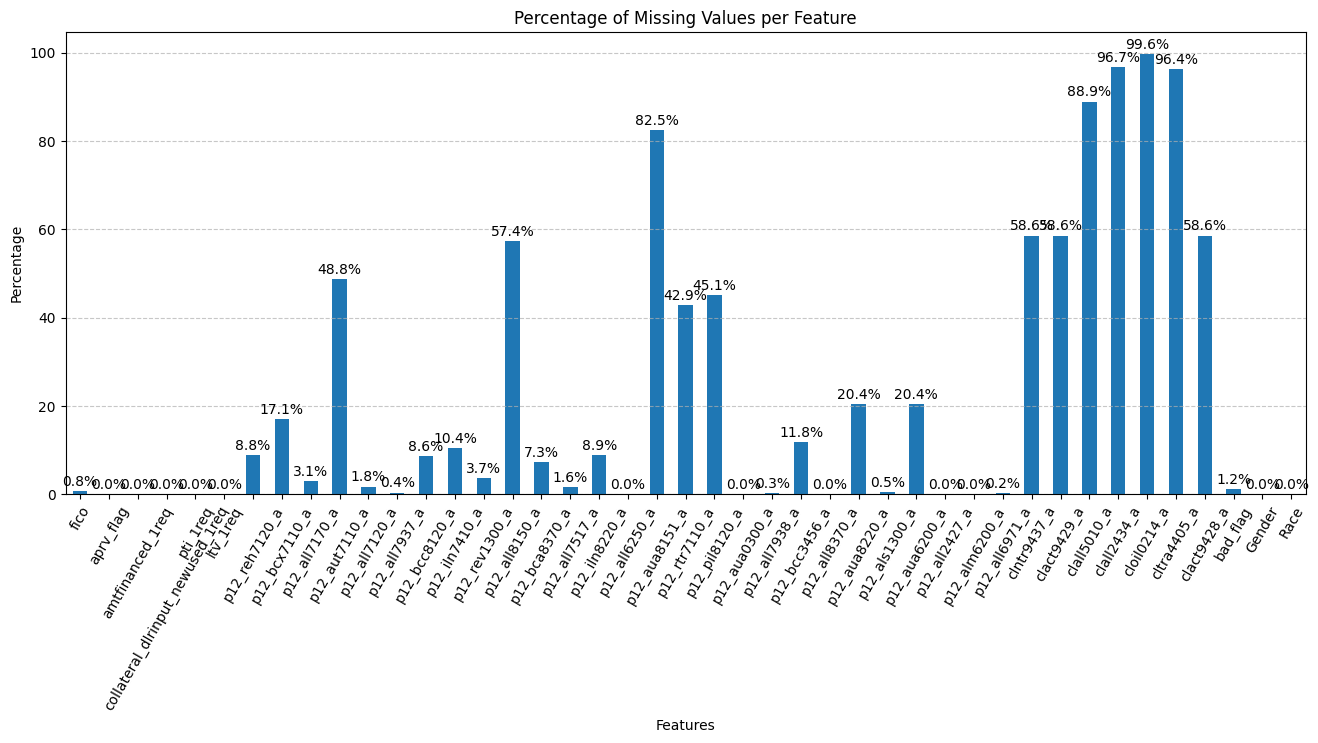

In [14]:
missing_data_plot(train_df)

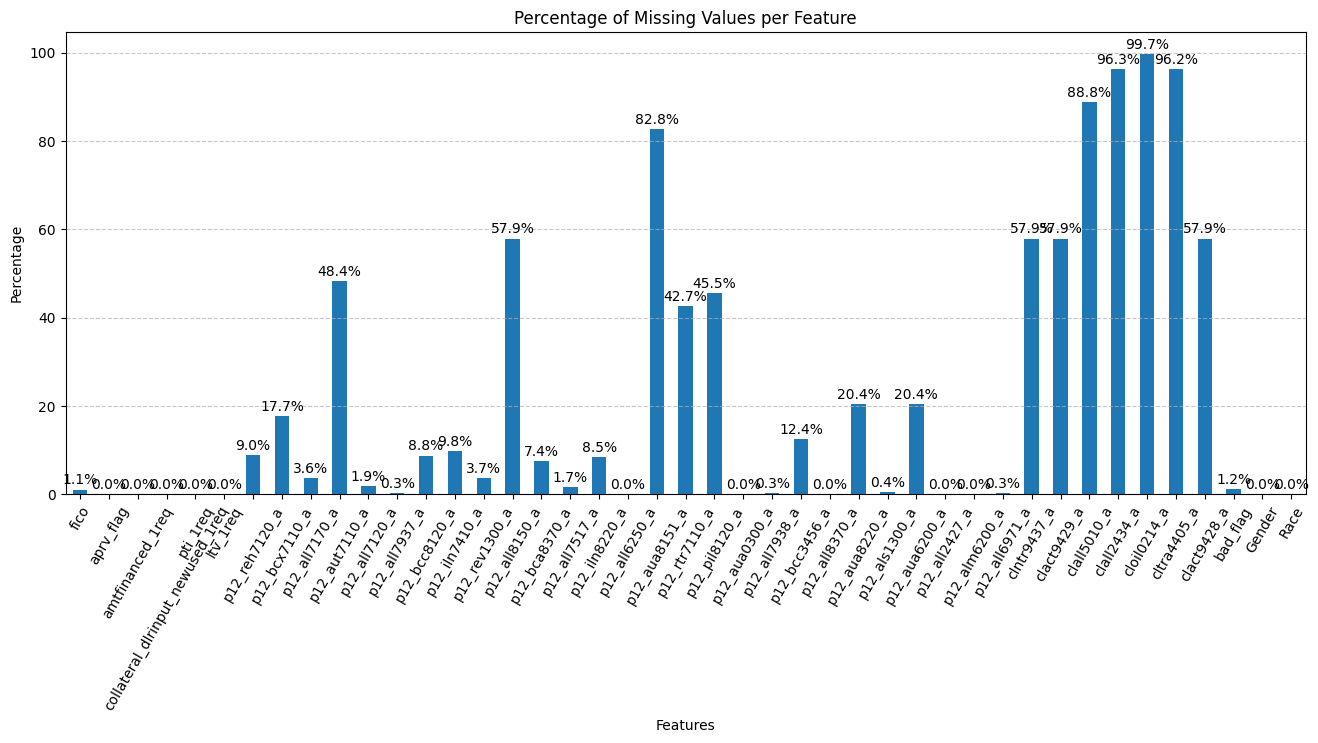

In [15]:
missing_data_plot(test_df)

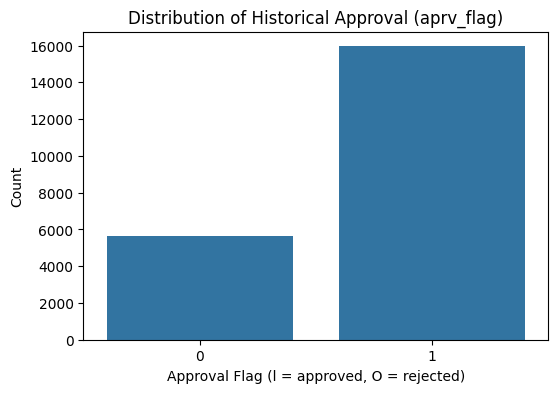

In [16]:
# Distribution of approval decisions
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=train_df)
plt.title('Distribution of Historical Approval (aprv_flag)')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

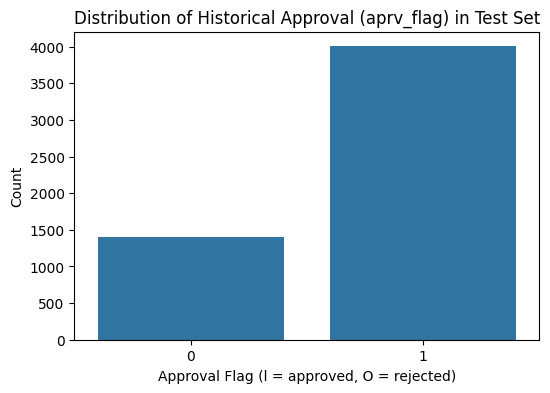

In [17]:
# Distribution of approval decisions in Test set
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=test_df)
plt.title('Distribution of Historical Approval (aprv_flag) in Test Set')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

In [18]:
def bar_char(df_data):
    gender_counts= df_data['Gender'].value_counts()
    gender_percent = (gender_counts/gender_counts.sum())*100
    plt.figure(figsize=(6,7))
    gender_percent.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)
    plt.grid(axis='y',linestyle= '--', alpha=0.4)

    # Annotate each bar with number
    for i, perc in enumerate(gender_percent):
        plt.text(i, perc+1, f'{perc:.2f}%', ha='center', va='bottom', fontsize=10) 
    plt.show()

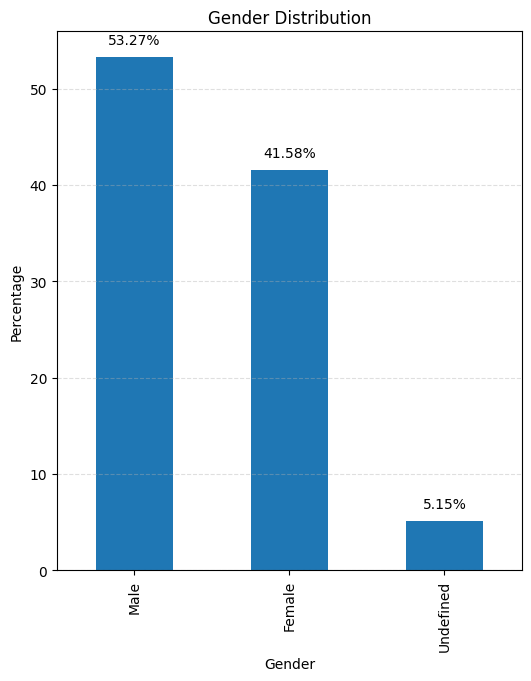

In [19]:
bar_char(train_df)

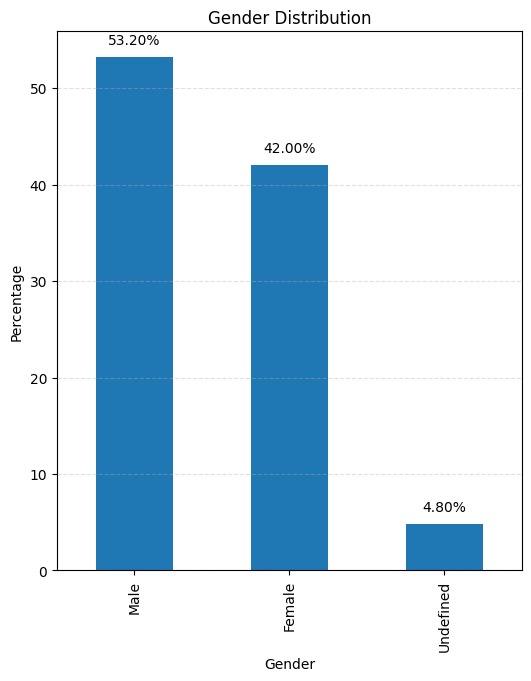

In [20]:
bar_char(test_df)

In [28]:
# Distribution of the race as a percentage
def bar_char_race(df_data):
    
    race_counts= df_data['Race'].value_counts()
    race_percent = (race_counts/race_counts.sum())*100
    plt.figure(figsize=(6,7))
    race_percent.plot(kind='bar')
    plt.title('Race Distribution')
    plt.xlabel('Race')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)
    plt.grid(axis='y',linestyle= '--', alpha=0.4)

    # Annotate each bar with number
    for i, perc in enumerate(race_percent):
        plt.text(i, perc+1, f'{perc:.2f}%', ha='center', va='bottom', fontsize=10) 
    plt.show()

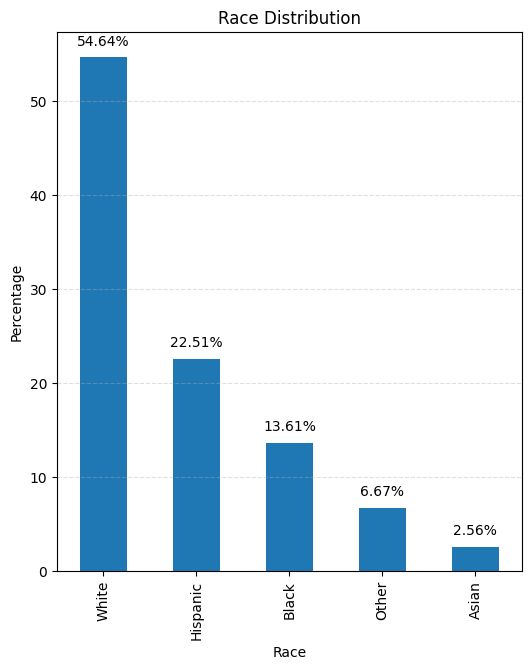

In [29]:
bar_char_race(train_df)

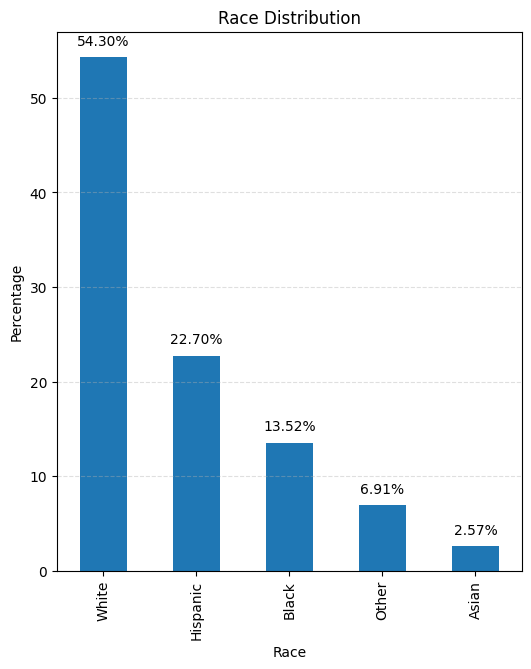

In [30]:
bar_char_race(test_df)

In [24]:
approval_rate = train_df['aprv_flag'].mean()
bad_flag_approval = train_df[train_df['aprv_flag'] == 1]['bad_flag'].mean()

print("approval rate: ", approval_rate, "\nbad flag approval rate: ", bad_flag_approval)

approval rate:  0.7383134314542257 
bad flag approval rate:  0.025328448711470438


Around 74% of the applicants were approved for the auto loan, and of these approved loans, 2.5% has poor performance.

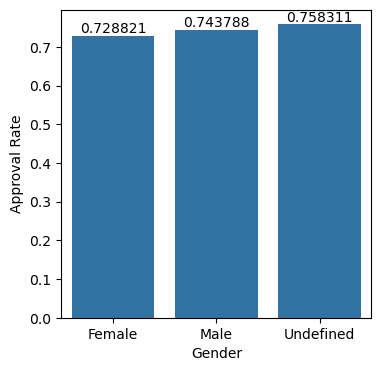

In [25]:
gender_approval = train_df.groupby('Gender')['aprv_flag'].agg('mean')

plt.figure(figsize=(4, 4))

ax = sns.barplot(pd.DataFrame(data = gender_approval), x = 'Gender', y = 'aprv_flag')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Approval Rate')
plt.show()

Females have a bit slightly lower approval rate than males. 

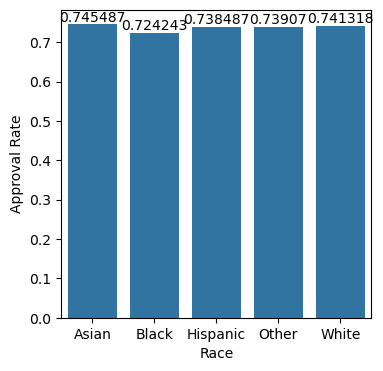

In [26]:
racial_approval = train_df.groupby('Race')['aprv_flag'].agg('mean')

plt.figure(figsize=(4, 4))

ax = sns.barplot(pd.DataFrame(data = racial_approval), x = 'Race', y = 'aprv_flag')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Approval Rate')
plt.show()

Asians have the highest approval rate and black have the lowest approval rate.

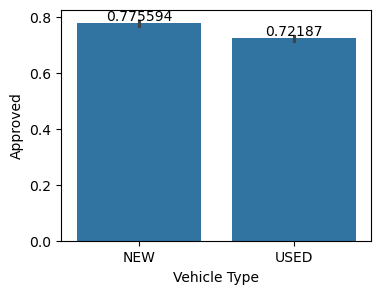

In [27]:
plt.figure(figsize=(4, 3))

ax = sns.barplot(data=train_df, x='collateral_dlrinput_newused_1req', y='aprv_flag')

ax.bar_label(ax.containers[0])
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Approved')
plt.show()

Loan for new cars was approved at a higher rate than used cars.

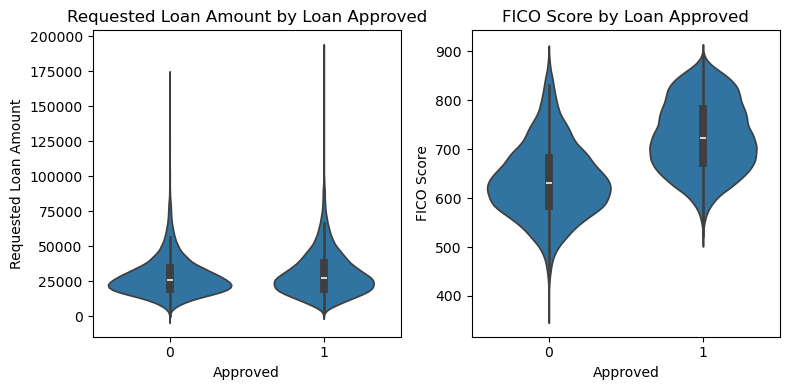

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, col in enumerate(['amtfinanced_1req', 'fico']):
    col_name = {'amtfinanced_1req': 'Requested Loan Amount', 'fico': 'FICO Score'}
    ax = sns.violinplot(data = train_df, x = 'aprv_flag', y = col, ax = axes[i])
    axes[i].set_title(f'{col_name[col]} by Loan Approved')
    ax.set_ylabel(col_name[col])
    ax.set_xlabel('Approved')

plt.tight_layout()
plt.show()

The violin plot of the "Requested Loan Amount by Loan Approved" shows that both approved and non approved loan are concentrated at lower loan amounts, indicating that the "Requested Loan Amount" may not be a strong predictor or loan approval. Moreover, the violin plot shows some high outliers. 

The violin plot of "FICO Score by Loan Approved" shows that approved loans have higher FICO scores. For rejected loans, the distribution is wider and more spread out indicating that there is a greater variability in FICO scores for rejected loans. While for accepted loans, the distribution is more concentrated around higher scores (600–800)

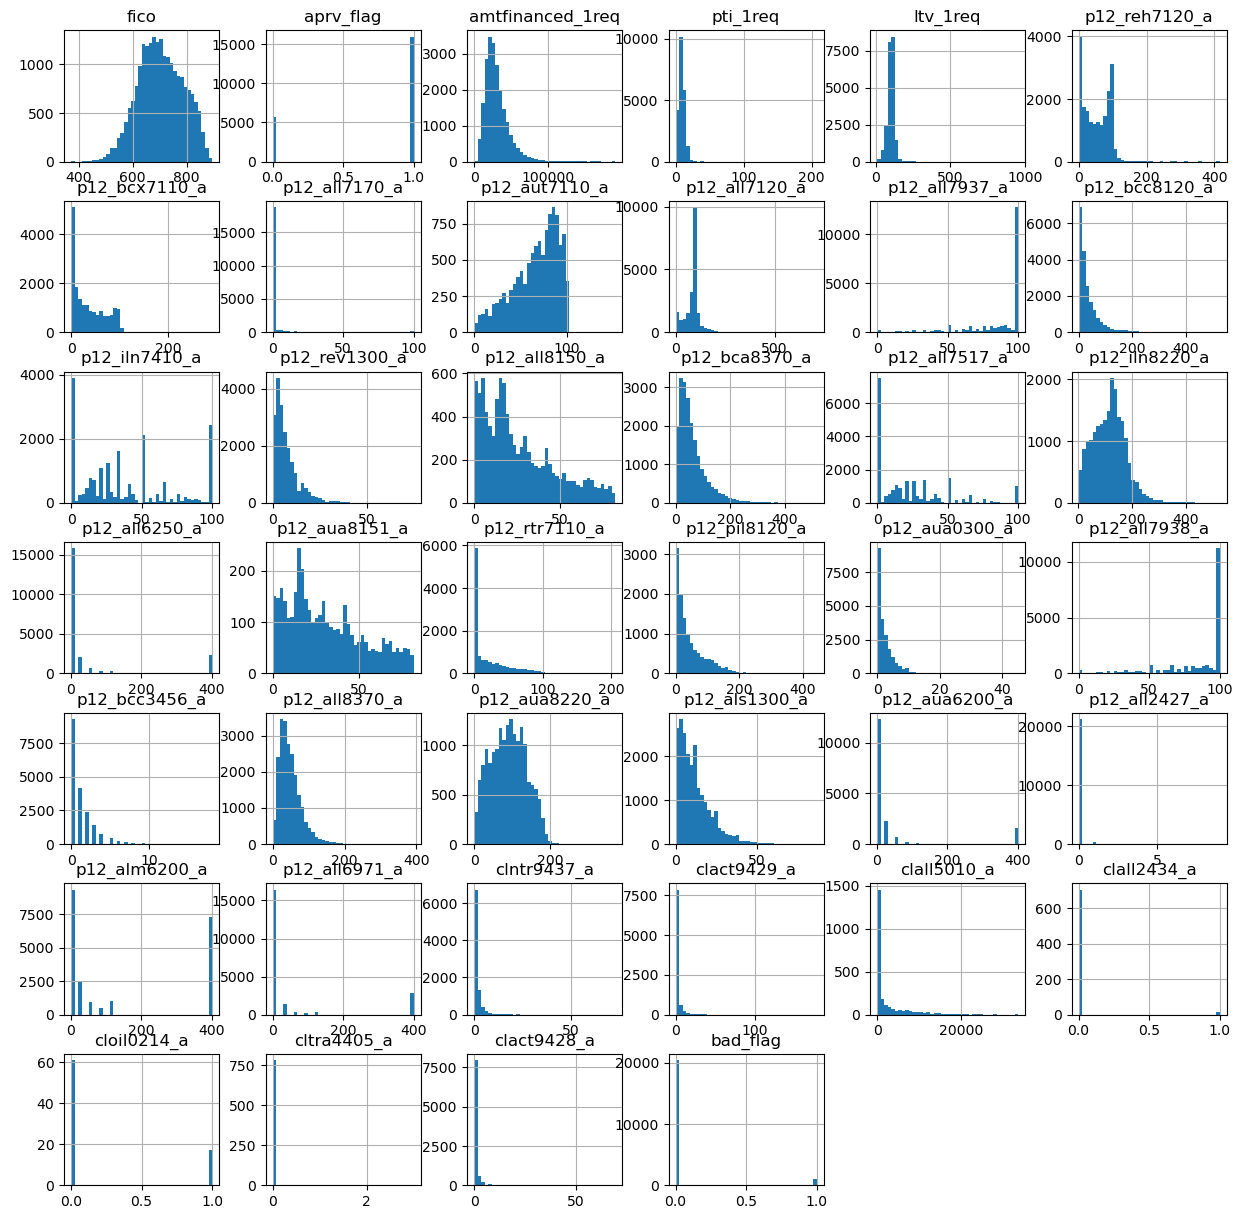

In [29]:
train_df.hist(bins=40 , figsize=(15,15))
plt.show()